<h1 style="text-align: center;">House-Price-Pred</h1>


### Introduction to the Dataset

The **Ames Housing dataset** serves as a comprehensive resource for analyzing the determinants of residential property prices in Ames, Iowa. This dataset is particularly notable for its **79 explanatory variables**, which encompass a wide range of factors influencing real estate valuation. These factors include structural attributes, location details, and various amenities that characterize residential properties.

#### Key Features of the Dataset:

- **SalePrice**: The primary target variable, representing the sale price of each property in U.S. dollars. This is the variable that the analysis aims to predict.

- **Structural Attributes**: Variables such as `OverallQual` (overall quality of materials and finish), `OverallCond` (condition of the property), and `HouseStyle` (type of dwelling) provide critical insights into the home's quality and style, which significantly affect market value.

- **Location Factors**: Features including `Neighborhood` (the physical location within Ames) and `MSZoning` (zoning classification) highlight the impact of geographic and regulatory factors on property prices. The area in which a home is located can dramatically influence its desirability and value.

- **Lot Characteristics**: Attributes like `LotArea` (size of the lot in square feet), `LotFrontage` (linear feet of street connected to the property), and `LotShape` (general shape of the property) are essential for understanding how the physical dimensions of a property contribute to its market value.

- **Interior Specifications**: Data points such as `GrLivArea` (above-grade living area), `TotalBsmtSF` (total square feet of basement area), and `KitchenQual` (quality of the kitchen) reflect the quality and quantity of living space within the home, which are crucial factors for potential buyers.

- **Utilities and Amenities**: Features like `Heating` (type of heating system), `CentralAir` (presence of central air conditioning), and `FireplaceQu` (quality of the fireplace) provide insights into the property's amenities, which can enhance its appeal and value.

#### Objectives of the Analysis:

The primary goal of this analysis is to leverage machine learning techniques to accurately predict housing prices based on the rich dataset provided. By exploring the relationships between various features and their influence on market valuations, this project aims to deliver valuable insights for prospective homebuyers. 

Through advanced regression techniques and innovative feature engineering, we aim to identify key drivers of housing prices, offering data-driven recommendations that can aid buyers in making informed purchasing decisions.

#### Dataset Access:

You can access the dataset [here](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1020-HousePricePred.zip)

This project endeavors to enhance understanding of the housing market dynamics and equip stakeholders with actionable insights that reflect the complexities of house pricing.

#### Importing all the necessary liberaries.

In [85]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')


### Step 1: Load the Data


In [86]:
# Load the dataset
df = pd.read_csv('data.csv')

In [87]:
# Display the first few rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [89]:
df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [91]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Step 2: Data Cleaning

In [92]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [93]:
# Handling missing values
# Impute LotFrontage with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [94]:
# Impute categorical features with mode
for col in ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 
            'Fence', 'MiscFeature']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [95]:
# Impute GarageYrBlt with the median YearBuilt where missing
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

In [96]:
# Verify that there are no missing values left
print("\nMissing values after imputation:")
df.isnull().sum().sum()


Missing values after imputation:


8

In [97]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [98]:
# Dropping duplicates if any
df = df.drop_duplicates()


In [99]:
# Convert data types if necessary
# Here, we'll make sure the following columns are treated as categorical
categorical_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']
df[categorical_columns] = df[categorical_columns].astype(str)

In [100]:
df.dtypes


Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [101]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460,1460,1460,1460.000000,1460,1460,1460,1460,1460.000000
unique,NaN,15,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,12,5,9,6,NaN
top,NaN,20,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,6,2009,WD,Normal,NaN
freq,NaN,536,1151,NaN,NaN,1454,1419,925,1311,1459,...,NaN,1456,1336,1455,NaN,253,338,1267,1198,NaN
mean,730.500000,NaN,NaN,69.863699,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,NaN,NaN,NaN,NaN,180921.195890
std,421.610009,NaN,NaN,22.027677,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,NaN,NaN,NaN,NaN,79442.502883
min,1.000000,NaN,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,34900.000000
25%,365.750000,NaN,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,129975.000000
50%,730.500000,NaN,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,163000.000000
75%,1095.250000,NaN,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,214000.000000


In [102]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
MasVnrArea    8
dtype: int64


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [104]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### Step 3: Exploratory Data Analysis (EDA)


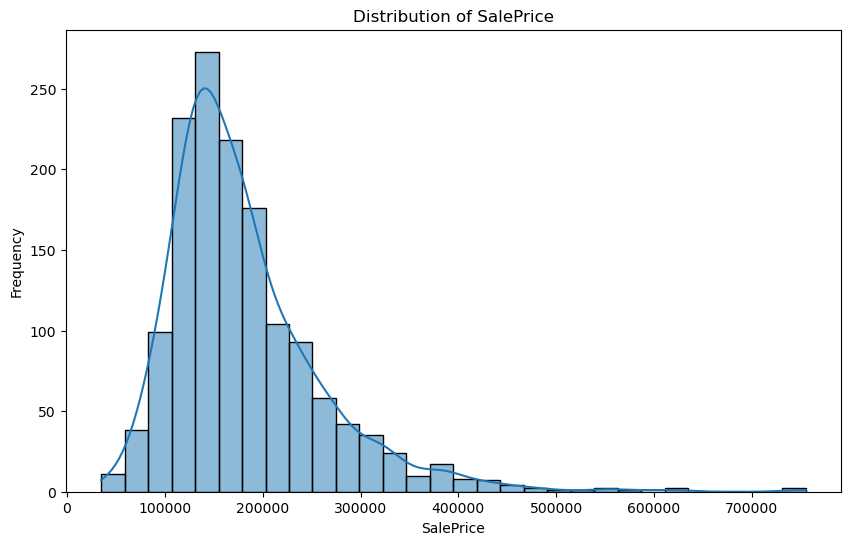

In [105]:
# 1. SalePrice Distribution Plot

# Create a figure with a specific size
plt.figure(figsize=(10, 6))
# Create a histogram with a kernel density estimate for SalePrice
sns.histplot(df['SalePrice'], kde=True, bins=30)
# Add a title to the plot
plt.title('Distribution of SalePrice')
# Label the x-axis
plt.xlabel('SalePrice')
# Label the y-axis
plt.ylabel('Frequency')
# Display the plot
plt.show()

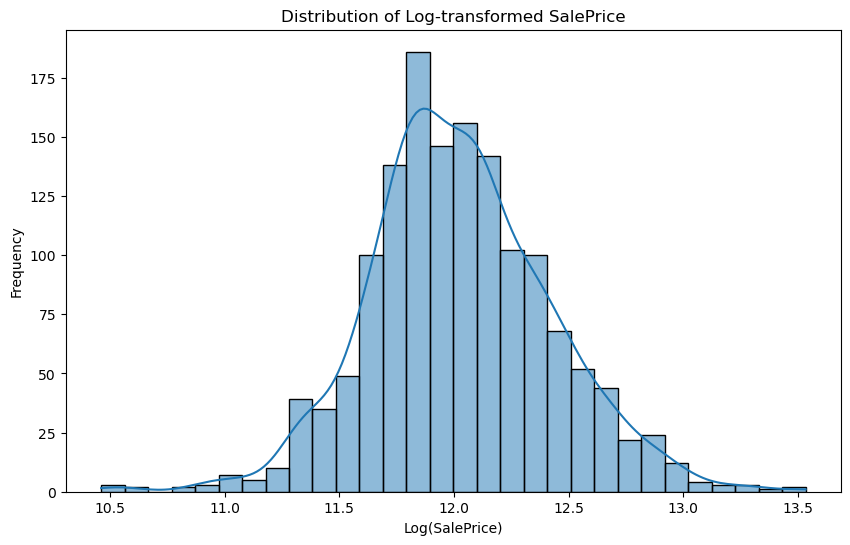

In [106]:
# 2. Log-transformed SalePrice Distribution Plot

# Apply log transformation to SalePrice and create a new column
df['SalePriceLog'] = np.log(df['SalePrice'])
# Create a figure with a specific size
plt.figure(figsize=(10, 6))
# Create a histogram with a kernel density estimate for Log-transformed SalePrice
sns.histplot(df['SalePriceLog'], kde=True, bins=30)
# Add a title to the plot
plt.title('Distribution of Log-transformed SalePrice')
# Label the x-axis
plt.xlabel('Log(SalePrice)')
# Label the y-axis
plt.ylabel('Frequency')
# Display the plot
plt.show()


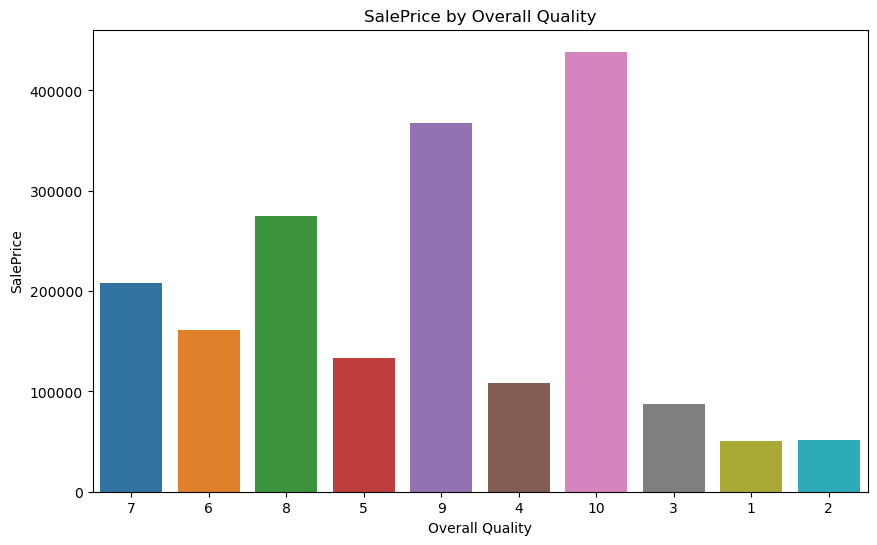

In [107]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a barplot to show the distribution of SalePrice by Overall Quality
# Set edgecolor to None to remove lines on top of the bars
sns.barplot(data=df, x='OverallQual', y='SalePrice', edgecolor=None, ci=None)

# Add a title to the plot
plt.title('SalePrice by Overall Quality')

# Label the x-axis
plt.xlabel('Overall Quality')

# Label the y-axis
plt.ylabel('SalePrice')

# Display the plot
plt.show()


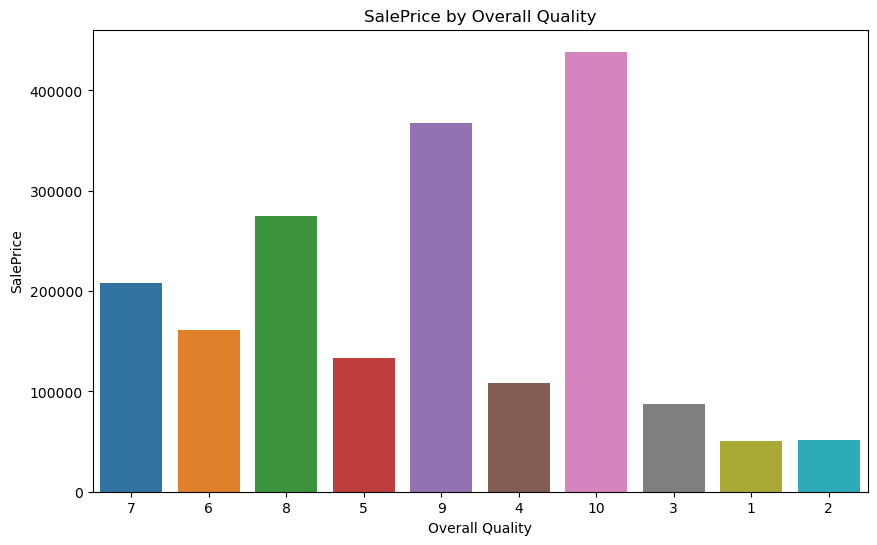

In [108]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Create a barplot to show the distribution of SalePrice by Overall Quality without edge lines
sns.barplot(data=df, x='OverallQual', y='SalePrice', edgecolor=None ,ci = None)

# Add a title to the plot
plt.title('SalePrice by Overall Quality')

# Label the x-axis
plt.xlabel('Overall Quality')

# Label the y-axis
plt.ylabel('SalePrice')

# Display the plot
plt.show()


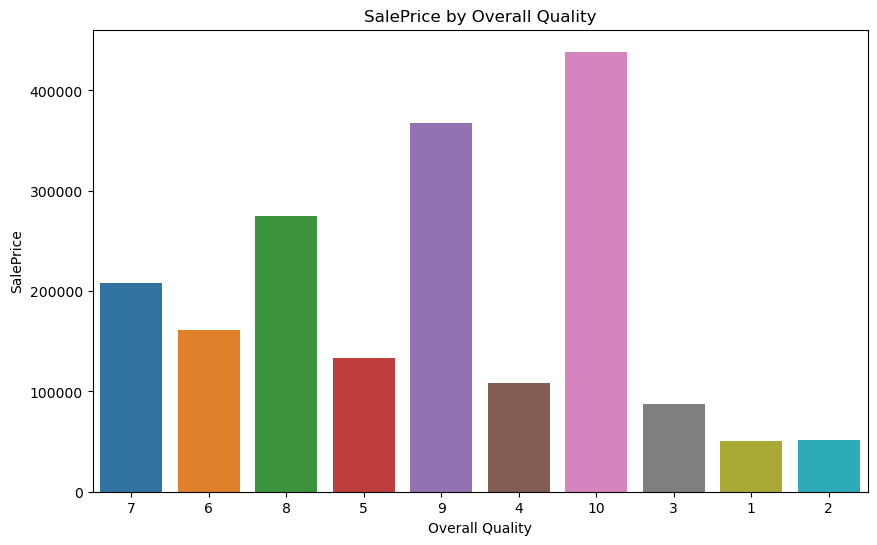

In [109]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))
# Create a barplot to show the distribution of SalePrice by Overall Quality
sns.barplot(data=df, x='OverallQual', y='SalePrice', ci=None)
# Add a title to the plot
plt.title('SalePrice by Overall Quality')
# Label the x-axis
plt.xlabel('Overall Quality')
# Label the y-axis
plt.ylabel('SalePrice')
# Display the plot
plt.show()


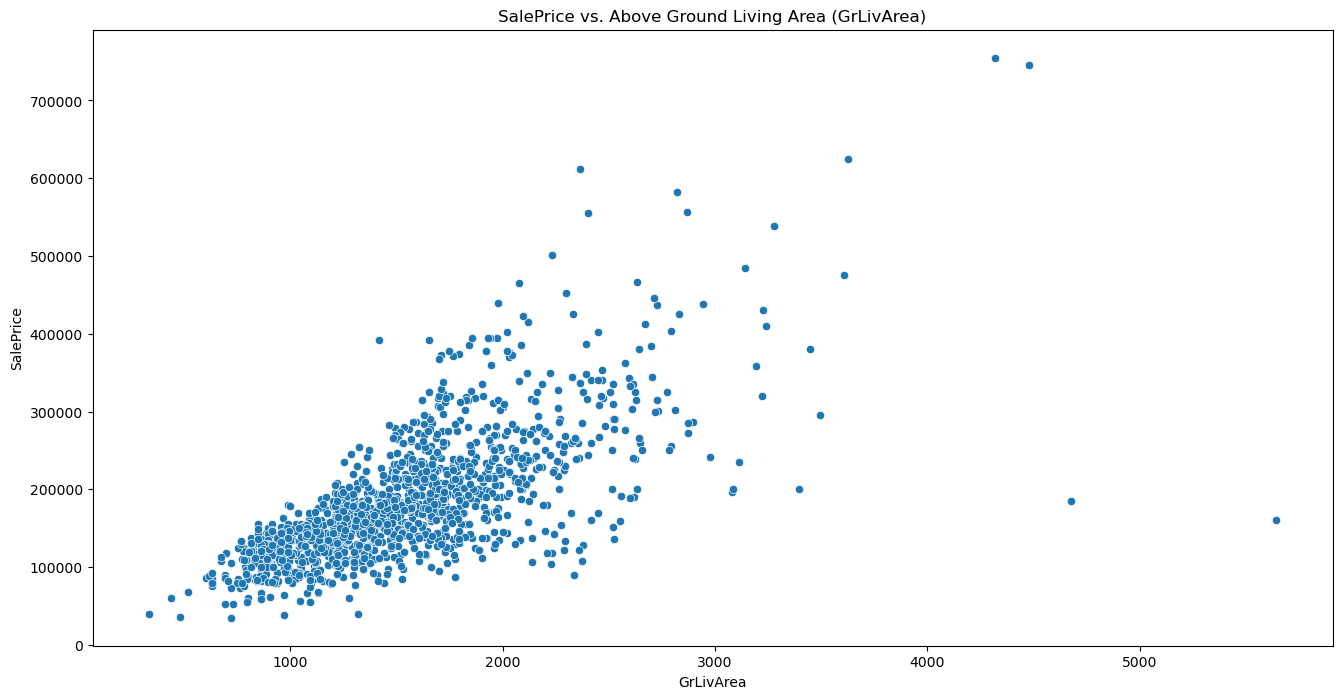

In [110]:
# Create a figure with a specific size
plt.figure(figsize=(16, 8))
# Create a scatterplot to show the relationship between SalePrice and Above Ground Living Area
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
# Add a title to the plot
plt.title('SalePrice vs. Above Ground Living Area (GrLivArea)')
# Label the x-axis
plt.xlabel('GrLivArea')
# Label the y-axis
plt.ylabel('SalePrice')
# Display the plot
plt.show()


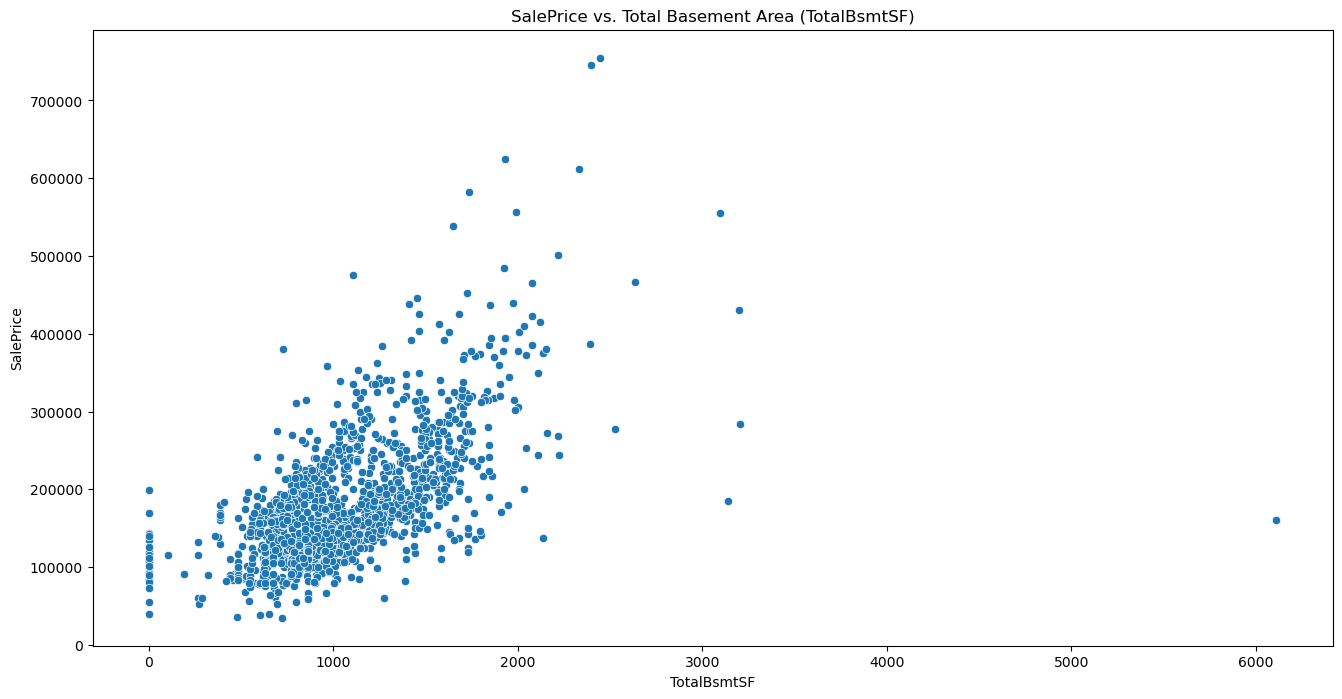

In [111]:
# Create a figure with a specific size
plt.figure(figsize=(16, 8))
# Create a scatterplot to show the relationship between SalePrice and Total Basement Area
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')
# Add a title to the plot
plt.title('SalePrice vs. Total Basement Area (TotalBsmtSF)')
# Label the x-axis
plt.xlabel('TotalBsmtSF')
# Label the y-axis
plt.ylabel('SalePrice')
# Display the plot
plt.show()


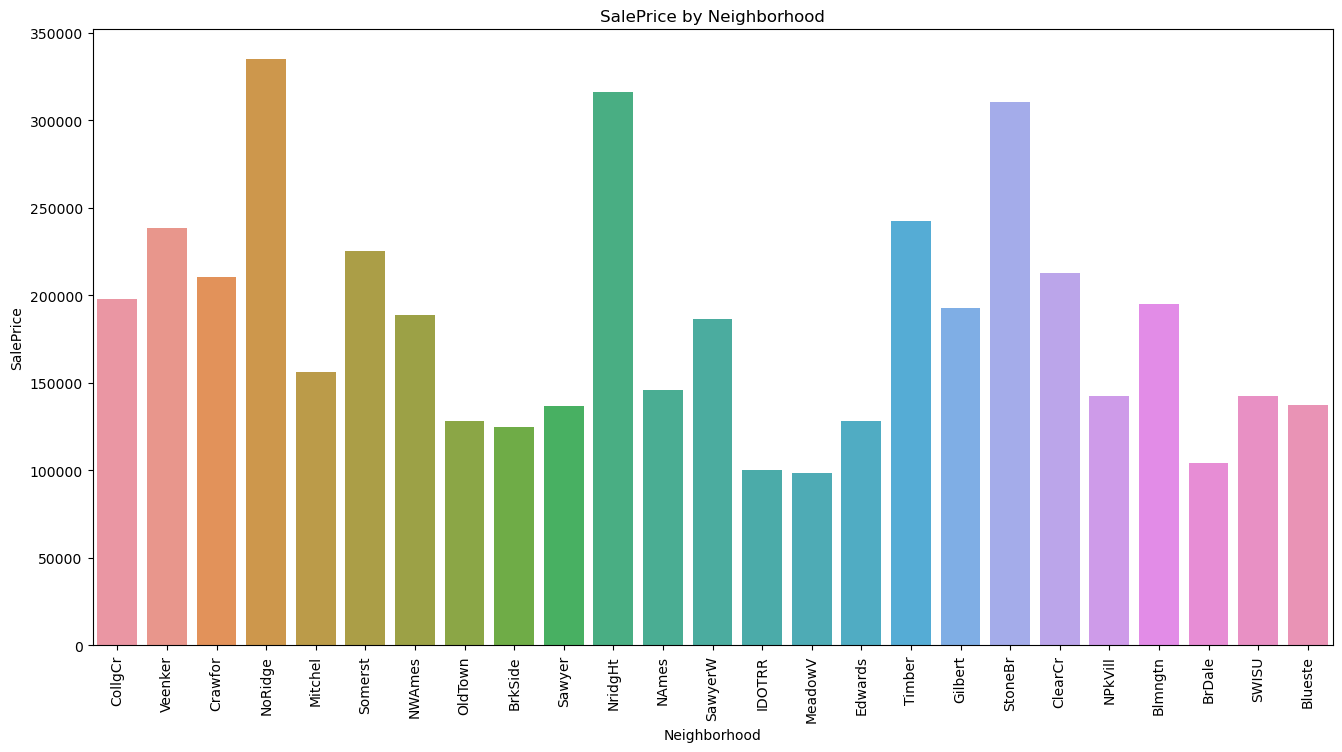

In [112]:
# Create a figure with a specific size
plt.figure(figsize=(16, 8))
# Create a barplot to show the distribution of SalePrice by Neighborhood
sns.barplot(data=df, x='Neighborhood', y='SalePrice', ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Add a title to the plot
plt.title('SalePrice by Neighborhood')
# Label the x-axis
plt.xlabel('Neighborhood')
# Label the y-axis
plt.ylabel('SalePrice')
# Display the plot
plt.show()


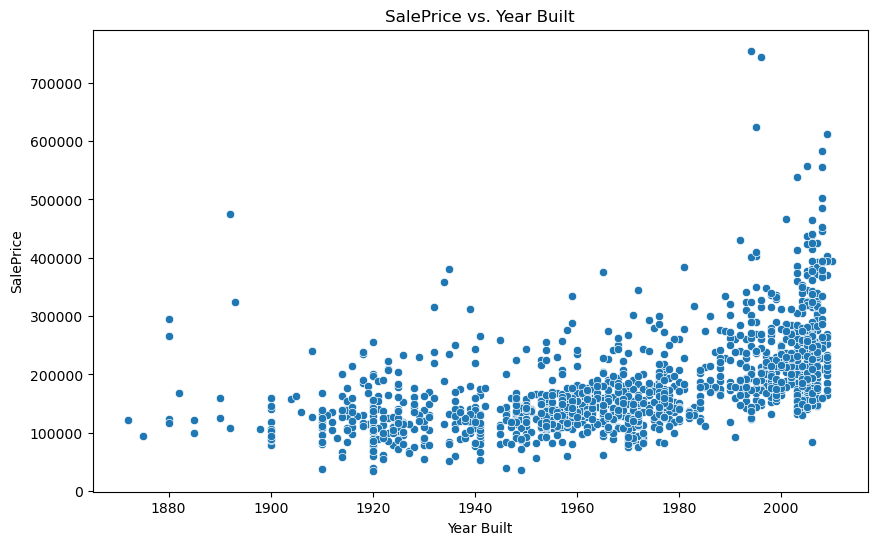

In [113]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))
# Create a scatterplot to show the relationship between SalePrice and Year Built
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')
# Add a title to the plot
plt.title('SalePrice vs. Year Built')
# Label the x-axis
plt.xlabel('Year Built')
# Label the y-axis
plt.ylabel('SalePrice')
# Display the plot
plt.show()


### Step 4: Data Preprocessing for Machine Learning

In [114]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [115]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [116]:
# Define preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize the numeric features
])


In [117]:
# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical features
])


In [118]:
# Combine preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [119]:
# Apply transformations to features
X_processed = preprocessor.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [120]:
# Print the shape of the training and testing sets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (1168, 335), (1168,)
Testing set shape: (292, 335), (292,)


### Step 5: Model Building and Evaluation


In [121]:
# Initialize the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print(f'MAE: {mean_absolute_error(y_test, lr_predictions):.2f}')
print(f'MSE: {mean_squared_error(y_test, lr_predictions):.2f}')
print(f'RMSE: {mean_squared_error(y_test, lr_predictions, squared=False):.2f}')
print(f'R²: {r2_score(y_test, lr_predictions):.2f}\n')


Linear Regression Performance:
MAE: 11233.47
MSE: 422599135.18
RMSE: 20557.22
R²: 0.94



In [122]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(f'MAE: {mean_absolute_error(y_test, rf_predictions):.2f}')
print(f'MSE: {mean_squared_error(y_test, rf_predictions):.2f}')
print(f'RMSE: {mean_squared_error(y_test, rf_predictions, squared=False):.2f}')
print(f'R²: {r2_score(y_test, rf_predictions):.2f}\n')


Random Forest Performance:
MAE: 1220.85
MSE: 94017820.95
RMSE: 9696.28
R²: 0.99



In [123]:
# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Performance:")
print(f'MAE: {mean_absolute_error(y_test, gb_predictions):.2f}')
print(f'MSE: {mean_squared_error(y_test, gb_predictions):.2f}')
print(f'RMSE: {mean_squared_error(y_test, gb_predictions, squared=False):.2f}')
print(f'R²: {r2_score(y_test, gb_predictions):.2f}\n')


Gradient Boosting Performance:
MAE: 1177.47
MSE: 45267998.57
RMSE: 6728.15
R²: 0.99



In [124]:
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Performance:")
print(f'MAE: {mean_absolute_error(y_test, xgb_predictions):.2f}')
print(f'MSE: {mean_squared_error(y_test, xgb_predictions):.2f}')
print(f'RMSE: {mean_squared_error(y_test, xgb_predictions, squared=False):.2f}')
print(f'R²: {r2_score(y_test, xgb_predictions):.2f}\n')


XGBoost Performance:
MAE: 2214.51
MSE: 167154121.22
RMSE: 12928.81
R²: 0.98



In [125]:
# Initialize the model
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)

# Fit the model
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Performance:")
print(f'MAE: {mean_absolute_error(y_test, lgb_predictions):.2f}')
print(f'MSE: {mean_squared_error(y_test, lgb_predictions):.2f}')
print(f'RMSE: {mean_squared_error(y_test, lgb_predictions, squared=False):.2f}')
print(f'R²: {r2_score(y_test, lgb_predictions):.2f}\n')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3739
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 214
[LightGBM] [Info] Start training from score 181441.541952
LightGBM Performance:
MAE: 3185.23
MSE: 294447799.49
RMSE: 17159.48
R²: 0.96



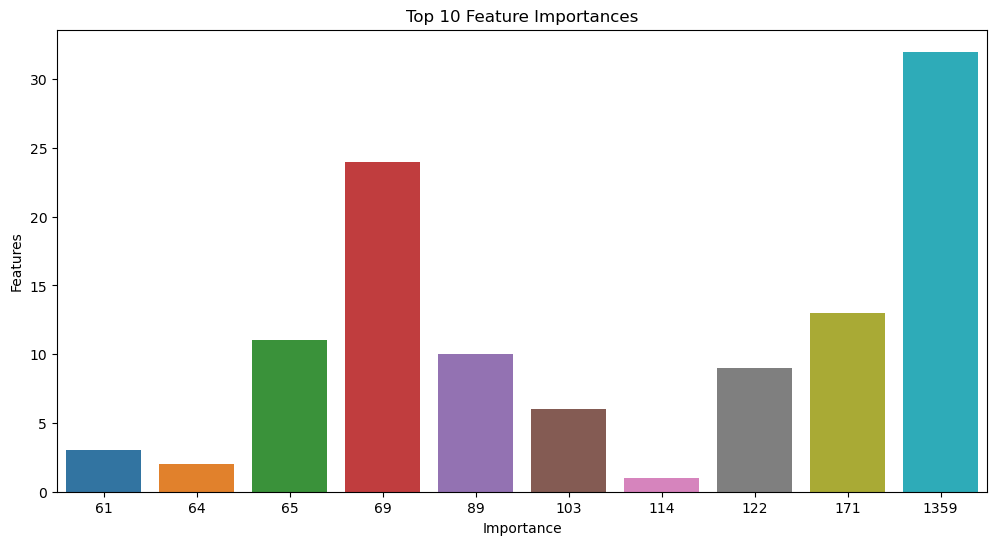

Top 10 important features:
- Feature 32
- Feature 13
- Feature 9
- Feature 1
- Feature 6
- Feature 10
- Feature 24
- Feature 11
- Feature 2
- Feature 3

Suggestions:
- Focus on improving 32 to potentially increase home value.
- Focus on improving 13 to potentially increase home value.
- Focus on improving 9 to potentially increase home value.
- Focus on improving 1 to potentially increase home value.
- Focus on improving 6 to potentially increase home value.
- Focus on improving 10 to potentially increase home value.
- Focus on improving 24 to potentially increase home value.
- Focus on improving 11 to potentially increase home value.
- Focus on improving 2 to potentially increase home value.
- Focus on improving 3 to potentially increase home value.


In [126]:
# Assuming lgb_model is already trained and X_train is your training features
# Get feature importance from the trained model
feature_importance = lgb_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': range(len(feature_importance)),  # Placeholder for feature names
    'Importance': feature_importance
})

# If you have feature names from your encoder, replace this line:
# importance_df['Feature'] = your_feature_names_here

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')  # Adjust y if you have names
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')  # Change to actual names if available
plt.show()

# Generate suggestions based on feature importance
important_features = importance_df.head(10)['Feature'].tolist()  # Adjust to actual names

print("Top 10 important features:")
for feature in important_features:
    print(f"- Feature {feature}")  # Adjust this line to show actual feature names

print("\nSuggestions:")
# Example suggestions based on important features
for feature in important_features:
    # Customize suggestions based on the specific features
    print(f"- Focus on improving {feature} to potentially increase home value.")


### Conclusion

The dataset is a valuable resource for understanding what influences residential property prices. With 79 variables detailing everything from house features to neighborhood characteristics, it enables us to analyze how different factors affect sale prices.

Our goal is to build a strong predictive model to accurately forecast housing prices. By applying advanced machine learning techniques, we will uncover key relationships between property features and their market values. 

The insights from this analysis will help homebuyers and real estate professionals make informed decisions in a complex market. Ultimately, this study aims to provide actionable recommendations, enhancing understanding of property value trends in Ames, Iowa.